In [1]:
# importing the required libraries
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px # Visualization tool like Matplotlib
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot

# Manipulating the default plot size
#plt.rcParams['figure.figsize'] = 10, 12
plt.rcParams['figure.figsize']=25,18
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import cufflinks as cf

#GEtting Plotly offline
pyo.init_notebook_mode(connected=True)
cf.go_offline()


In [3]:
from google.colab import files
uploaded=files.upload()

Saving covid_19_data.csv to covid_19_data.csv


# Reading the Datasets

In [4]:
df=pd.read_csv('covid_19_data.csv')

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [6]:
df.rename(columns={'Country/Region':'Country'},inplace=True)


In [7]:
df.rename(columns={'Provience/State':'State'},inplace=True)

In [8]:
df.tail()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


# Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country          306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [10]:
df.isnull().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [11]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


# Data Visualization

In [ ]:
# df.style.background_gradient(cmap='Reds)

In [12]:
confirmed=df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/01/2021,84092619.0
1,01/02/2021,84718978.0
2,01/03/2021,85251774.0
3,01/04/2021,85805892.0
4,01/05/2021,86546014.0
...,...,...
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0


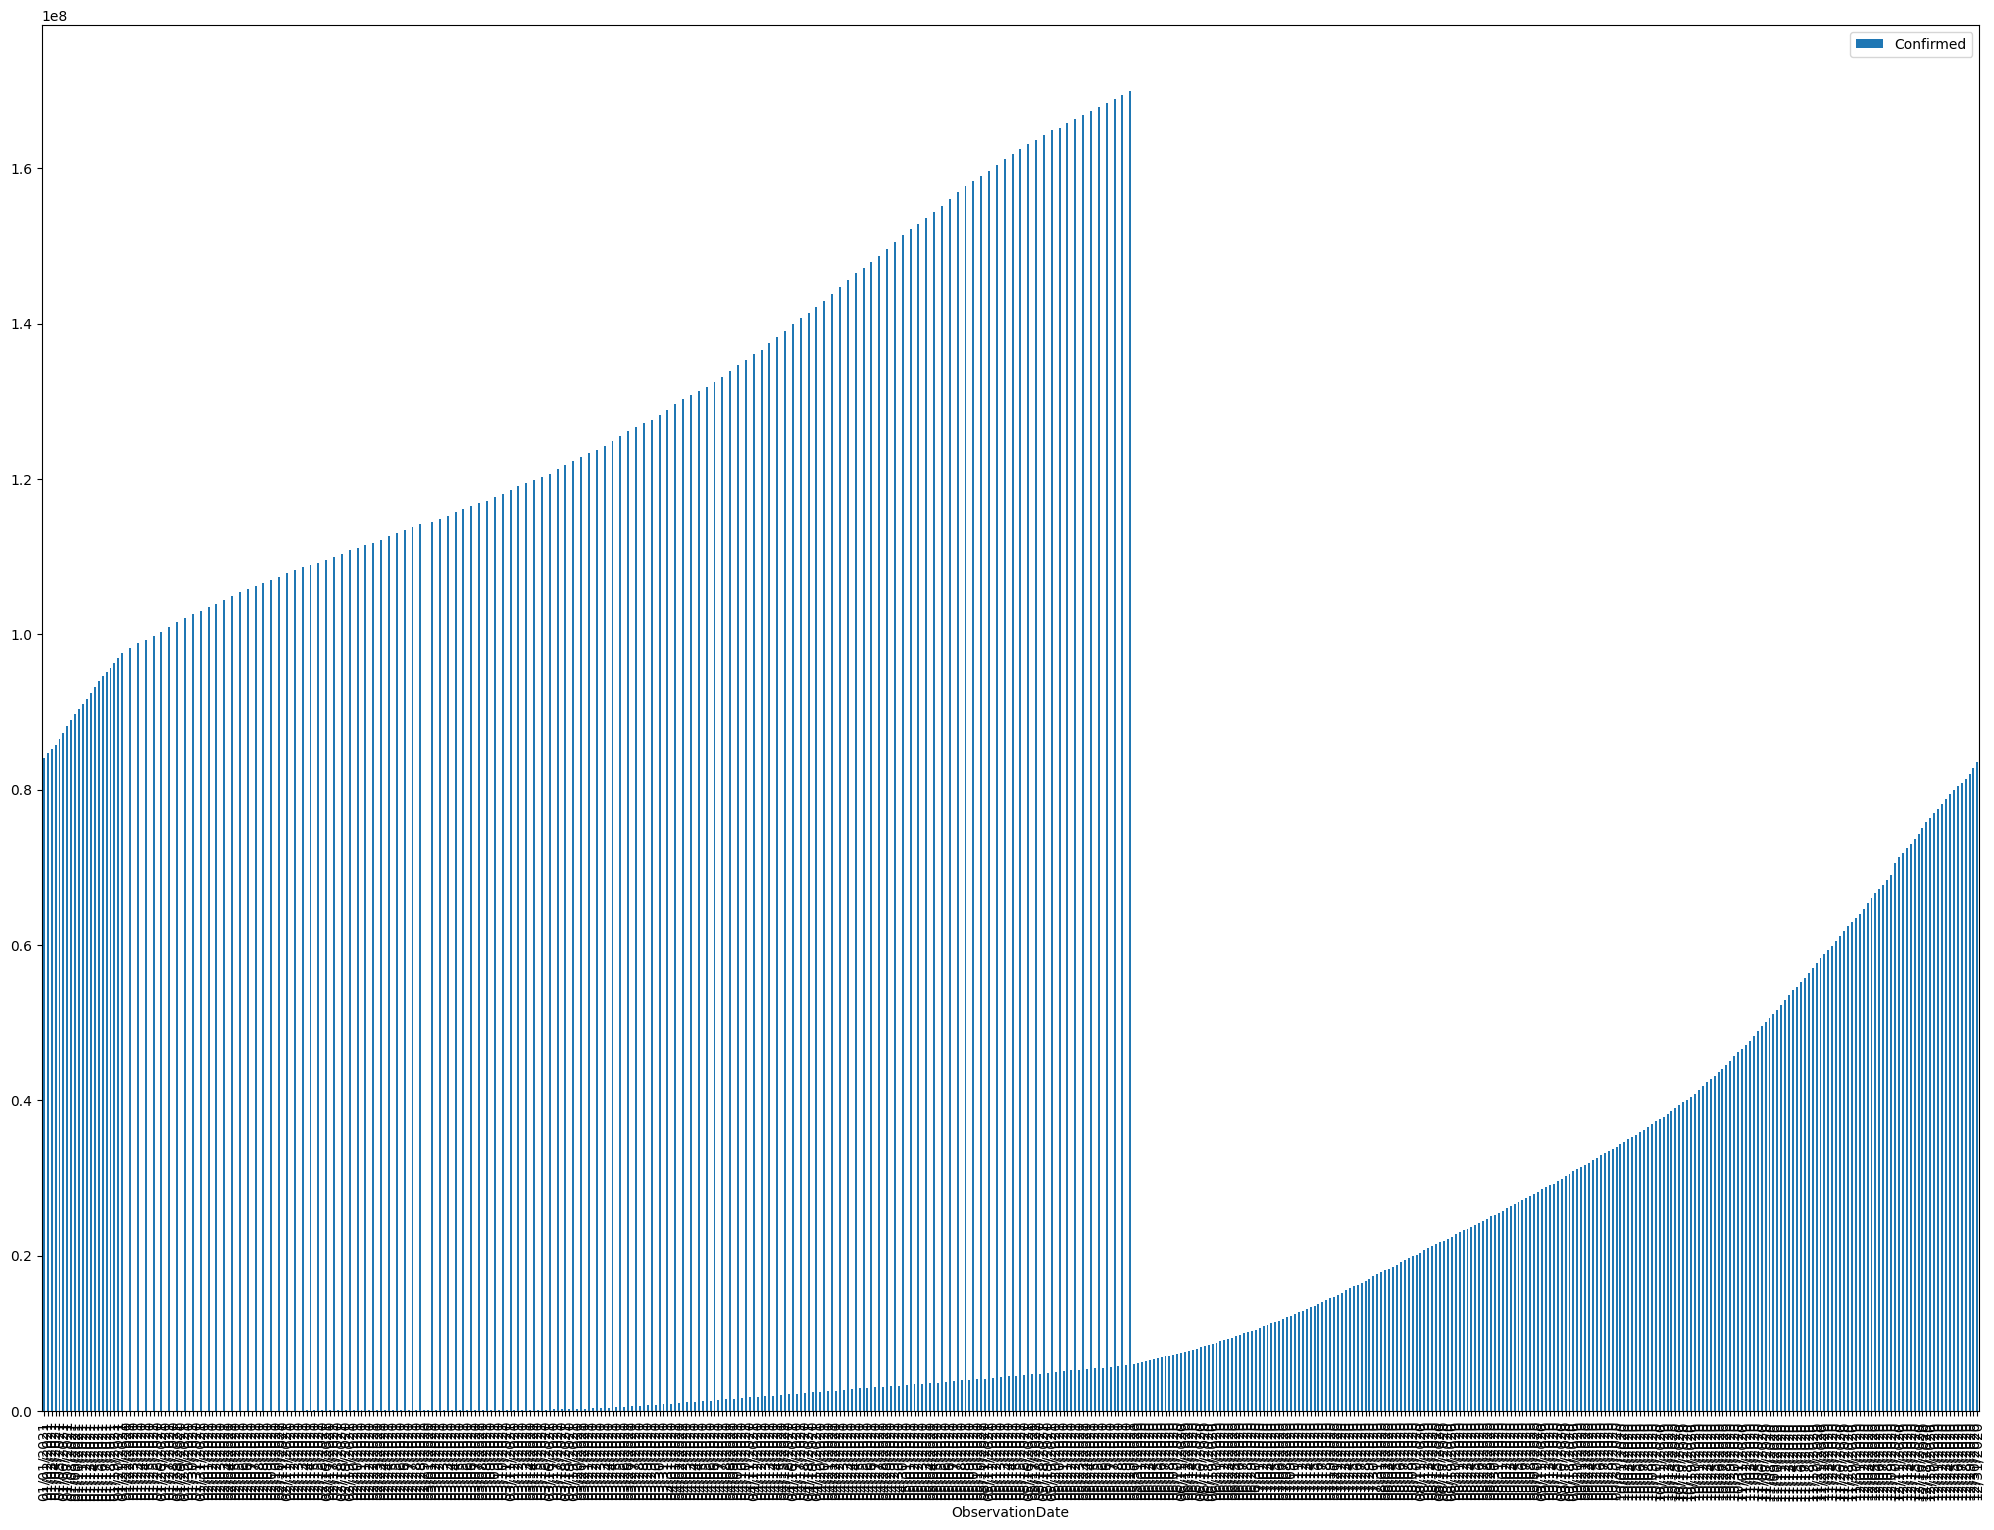

In [ ]:
# Pandas visualization

confirmed.plot(kind='bar',x='ObservationDate',y='Confirmed')
plt.show()

In [13]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0
...,...,...
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0


In [14]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/01/2021,47313005.0
1,01/02/2021,47614297.0
2,01/03/2021,47882779.0
3,01/04/2021,48173187.0
4,01/05/2021,48488548.0
...,...,...
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0


# Making the Prediction using FB Prophet

In [15]:
pip install pystan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 6.2 MB/s eta 0:00:00


In [16]:

import io, os, sys, setuptools, tokenize

In [21]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import prophet

In [23]:
from prophet import Prophet

In [24]:
df.head()

,SNo,ObservationDate,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [25]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()


In [26]:
confirmed.tail(10)

,ObservationDate,Confirmed
484,12/22/2020,78134244.0
485,12/23/2020,78829366.0
486,12/24/2020,79496006.0
487,12/25/2020,79961556.0
488,12/26/2020,80474158.0
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0
493,12/31/2020,83559601.0


In [27]:
deaths.tail(10)

,ObservationDate,Deaths
484,12/22/2020,1722999.0
485,12/23/2020,1736628.0
486,12/24/2020,1748259.0
487,12/25/2020,1756861.0
488,12/26/2020,1764260.0
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0
493,12/31/2020,1825012.0


In [28]:
recovered.tail(10)

,ObservationDate,Recovered
484,12/22/2020,44086740.0
485,12/23/2020,44410880.0
486,12/24/2020,44725552.0
487,12/25/2020,45017158.0
488,12/26/2020,45425322.0
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0
493,12/31/2020,47032627.0


In [29]:
 # The input to Prophet is always a dataframe with two columns: ds and y.
 # The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.
 # The y column must be numeric, and represents the measurement we wish to forecast.



In [30]:
confirmed.columns = ['ds','y']
#confirmed['ds'] = confirmed['ds'].dt.date
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [31]:
confirmed.head()

,ds,y
0,2021-01-01,84092619.0
1,2021-01-02,84718978.0
2,2021-01-03,85251774.0
3,2021-01-04,85805892.0
4,2021-01-05,86546014.0


In [33]:
confirmed.tail()

,ds,y
489,2020-12-27,80912611.0
490,2020-12-28,81408934.0
491,2020-12-29,82073362.0
492,2020-12-30,82834592.0
493,2020-12-31,83559601.0


# 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.


In [34]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [35]:
from prophet import Prophet
model= Prophet(interval_width=0.95)
model.fit(confirmed)
future = model.make_future_dataframe(periods=131) #making a dataframe for no. of dates

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/9vbey_aw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/xjoqqajw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41859', 'data', 'file=/tmp/tmp0jggfr91/9vbey_aw.json', 'init=/tmp/tmp0jggfr91/xjoqqajw.json', 'output', 'file=/tmp/tmp0jggfr91/prophet_model3b9ozkuy/prophet_model-20230621050343.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:03:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:03:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [36]:
future.tail(140)

,ds
485,2021-05-21
486,2021-05-22
487,2021-05-23
488,2021-05-24
489,2021-05-25
490,2021-05-26
491,2021-05-27
492,2021-05-28
493,2021-05-29
494,2021-05-30


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals.

In [38]:
#predicting the future with date, and upper and lower limit of y value
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)
'''
ds= date
yhat = prediction
lower & upper = limit

'''


'\nds= date\nyhat = prediction\nlower & upper = limit\n\n'

You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.

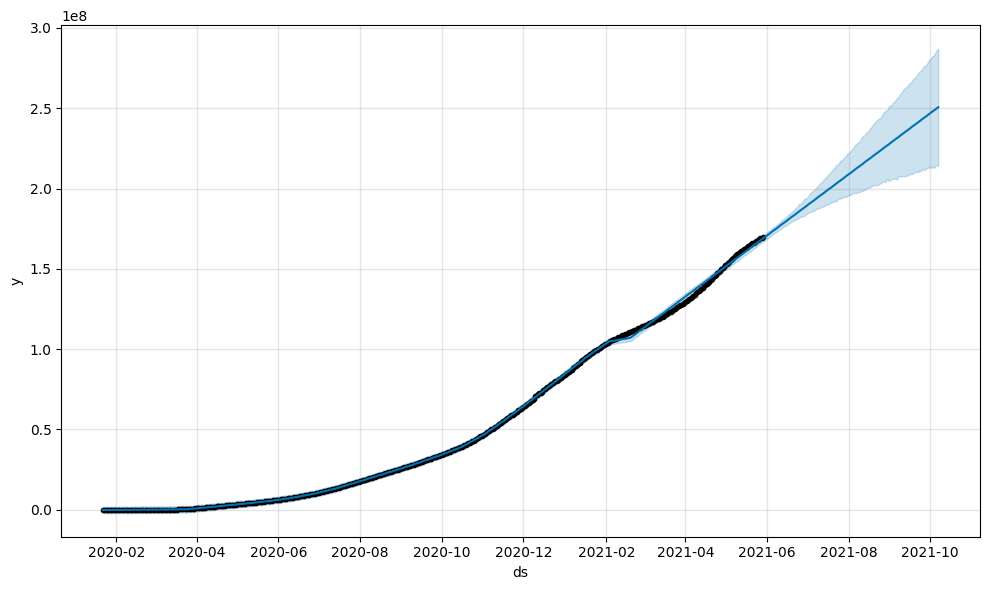

In [40]:
confirmed_forecast_plot=model.plot(forecast)

In [ ]:
confirmed_forecast_plot =m.plot_components(forecast)

In [41]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [42]:
model = Prophet(interval_width=0.95)
model.fit(deaths)
future = model.make_future_dataframe(periods=131)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/gx99f4xs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/u6fcx3la.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79953', 'data', 'file=/tmp/tmp0jggfr91/gx99f4xs.json', 'init=/tmp/tmp0jggfr91/u6fcx3la.json', 'output', 'file=/tmp/tmp0jggfr91/prophet_modelkqakmhi7/prophet_model-20230621050550.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:05:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:05:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [43]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,3411777.486,3388086.934,3437417.491
486,2021-05-22,3422309.962,3399245.994,3447485.016
487,2021-05-23,3430674.515,3405572.000,3455939.347
488,2021-05-24,3440202.948,3415345.964,3466414.038
489,2021-05-25,3452279.798,3427655.560,3475885.512
490,2021-05-26,3464533.758,3439148.091,3489399.624
491,2021-05-27,3476526.075,3452870.348,3499369.061
492,2021-05-28,3488336.224,3463629.116,3512903.862
493,2021-05-29,3498868.700,3474961.512,3523091.843
494,2021-05-30,3507233.253,3482199.430,3531307.955


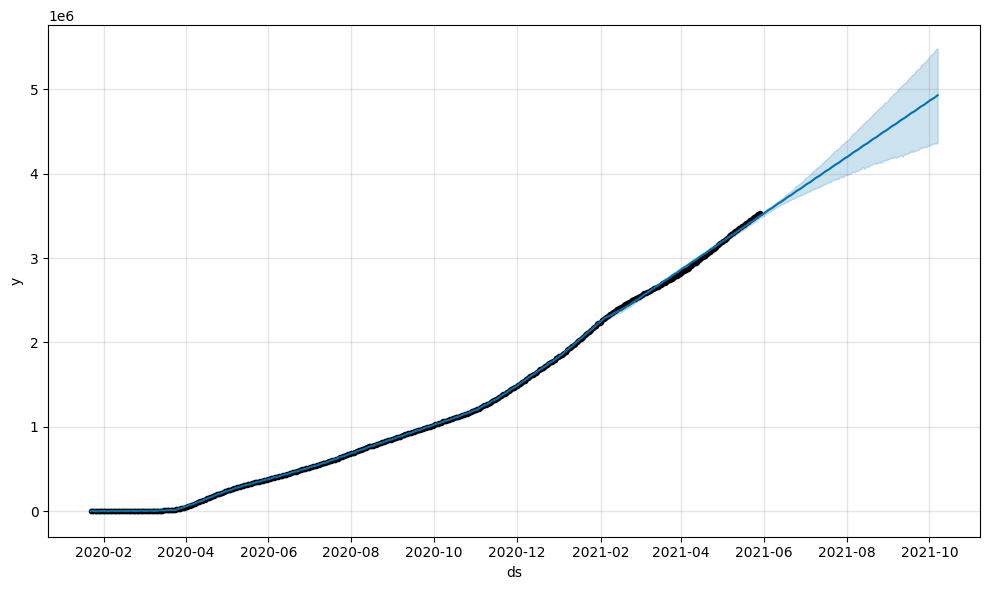

In [44]:
deaths_forecast_plot = model.plot(forecast)

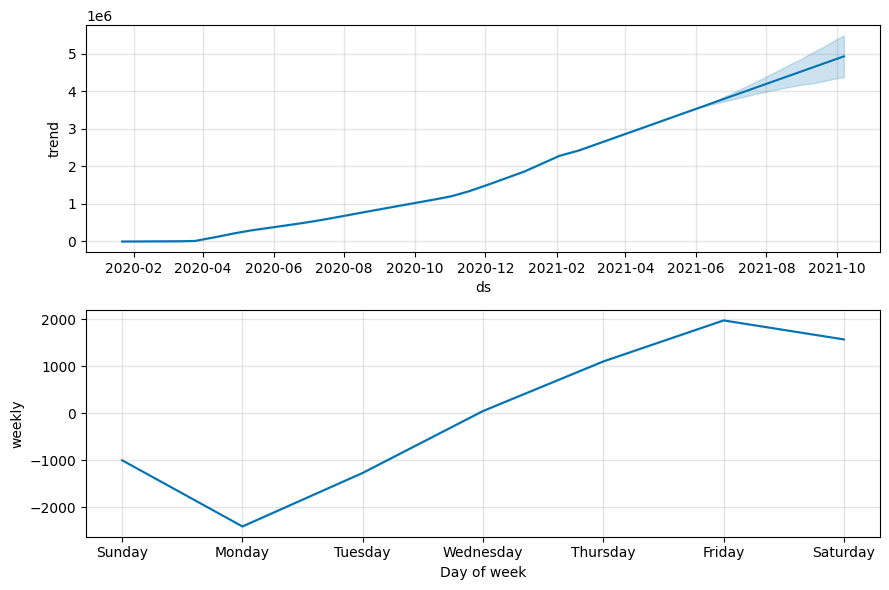

In [45]:
deaths_forecast_plot = model.plot_components(forecast)

# 4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)
Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors

In [46]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])


In [47]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/tacd6hc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0jggfr91/_fa7ot12.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22621', 'data', 'file=/tmp/tmp0jggfr91/tacd6hc6.json', 'init=/tmp/tmp0jggfr91/_fa7ot12.json', 'output', 'file=/tmp/tmp0jggfr91/prophet_model3xlxluxb/prophet_model-20230621050638.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:06:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:06:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [48]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(140)

,ds,yhat,yhat_lower,yhat_upper
485,2021-05-21,98343776.556,95492229.742,101103208.809
486,2021-05-22,98816757.040,95987774.559,101391776.638
487,2021-05-23,99165491.134,96301329.216,101966371.379
488,2021-05-24,99607173.274,97029337.198,102529775.947
489,2021-05-25,99979112.989,97023916.558,102822249.893
490,2021-05-26,100441894.675,97653363.162,103247405.139
491,2021-05-27,100893218.983,98070350.653,103894151.669
492,2021-05-28,101335081.887,98542899.714,104260975.700
493,2021-05-29,101808062.371,98925698.218,104614733.910
494,2021-05-30,102156796.465,99224504.719,105190262.745


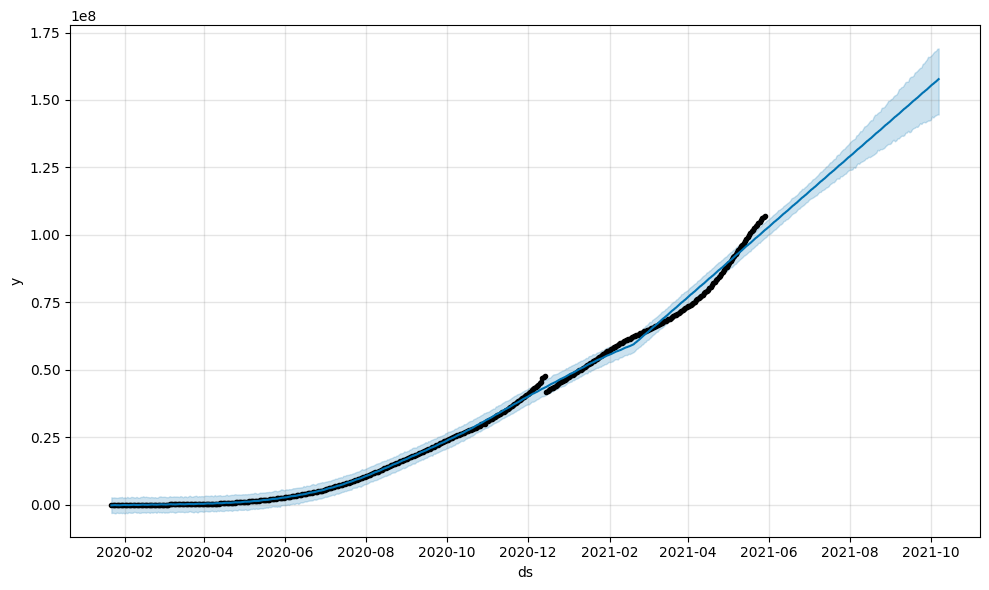

In [49]:
recovered_forecast_plot = m.plot(forecast)

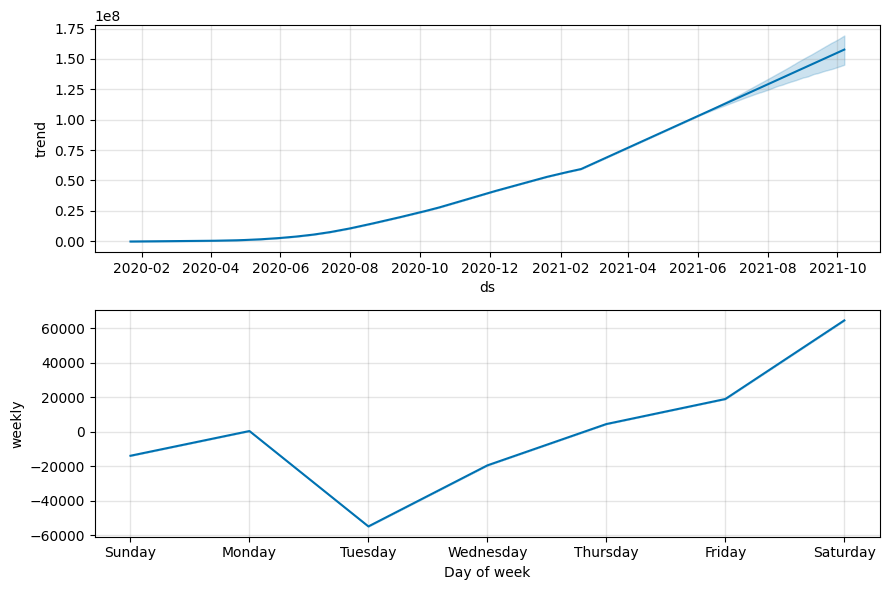

In [50]:
recovered_forecast_plot = m.plot_components(forecast)